In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [6, 5]
   }
matplotlib.rcParams.update(params)
cmap = matplotlib.colormaps['tab10']

### Load Simulation Data (Patient Level)

In [3]:
df = pd.read_csv('log.csv')
df = df[df.discharge_day.notna()]
df.head()

,id,mrn,admit_id,admit_date,service,arrival_time,bed,floor,bed_assign_time,discharge_date,...,discharge_month,discharge_day,discharge_hour,discharge_dayofweek,arrival_month,arrival_day,arrival_hour,arrival_dayofweek,bed_wait_mins,LOS_hours
0,9472191 7316185,9472191,7316185,01-01-2022,A,2022-01-01 04:59:24,1,1,2022-01-01 04:59:24,01-02-2022,...,1.0,2.0,12.0,6.0,1,1,4,5,0.0,31.228333
1,2794485 3646214,2794485,3646214,01-01-2022,B,2022-01-01 06:19:56,2,1,2022-01-01 06:19:56,01-02-2022,...,1.0,2.0,12.0,6.0,1,1,6,5,0.0,29.882500
2,3144768 1837451,3144768,1837451,01-01-2022,A,2022-01-01 06:39:52,4,1,2022-01-01 06:39:52,01-02-2022,...,1.0,2.0,12.0,6.0,1,1,6,5,0.0,29.339444
3,1555345 2918997,1555345,2918997,01-01-2022,A,2022-01-01 06:59:48,5,1,2022-01-01 06:59:48,01-02-2022,...,1.0,2.0,12.0,6.0,1,1,6,5,0.0,29.840833
4,1914372 7662538,1914372,7662538,01-01-2022,B,2022-01-01 07:29:51,9,1,2022-01-01 07:29:51,01-02-2022,...,1.0,2.0,13.0,6.0,1,1,7,5,0.0,29.730833


In [4]:
df.columns

Index(['id', 'mrn', 'admit_id', 'admit_date', 'service', 'arrival_time', 'bed',
       'floor', 'bed_assign_time', 'discharge_date', 'rounding team',
       'rounding MD', 'rounding APP', 'rounding_floor_adder', 'rounding_queue',
       'rounding_begin_time', 'rounding_end_time',
       'discharge_process_begin_time', 'discharge_process_end_time',
       'discharge_process_app', 'discharge_process_nurse',
       'pharmacist_begin_time', 'pharmacist_end_time', 'pharmacist_staff',
       'final_discharge_time', 'bedstaff_begin_time', 'bedstaff_end_time',
       'bedstaff_staff', 'case_management_begin_time',
       'case_management_end_time', 'case_management_staff',
       'transport_begin_time', 'transport_end_time', 'transport_staff',
       'equipment_begin_time', 'equipment_end_time', 'equipment_staff',
       'medication', 'cm', 'transport', 'equipment', 'discharge_month',
       'discharge_day', 'discharge_hour', 'discharge_dayofweek',
       'arrival_month', 'arrival_day', 'arriv

#### Arrival

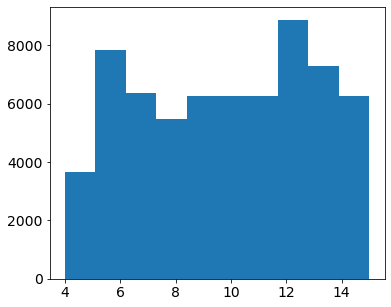

In [5]:
fig, ax = plt.subplots()
ax.hist(df.arrival_hour.values)
plt.show()

#### Discharge

<AxesSubplot:>

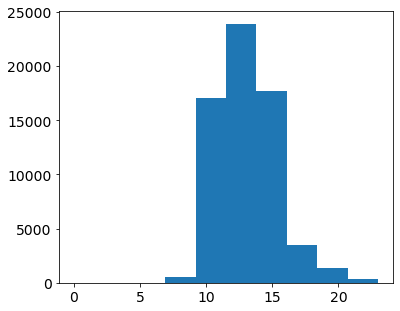

In [6]:
df.discharge_hour.hist(grid=False)

#### Bed Wait Time

<AxesSubplot:>

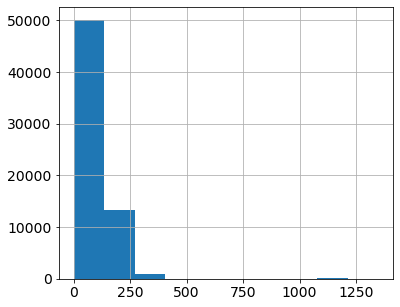

In [7]:
df.bed_wait_mins.hist()

<AxesSubplot:>

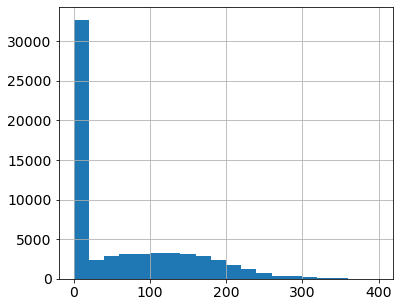

In [8]:
df[(df.bed_wait_mins>=0) & (df.bed_wait_mins<400)].bed_wait_mins.hist(bins=20)

#### CDF

In [9]:
H1,X1 = np.histogram( df.discharge_hour, bins = 100, normed = True )
dx1 = X1[1]-X1[0]
F1 = np.cumsum(H1)*dx1
H2,X2 = np.histogram( df.arrival_hour, bins = 100, normed = True )
dx2 = X2[1]-X2[0]
F2 = np.cumsum(H2)*dx2

/var/folders/wv/htqckb0n0b307_3v1zfmddjh0000gn/T/ipykernel_53017/2415645516.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H1,X1 = np.histogram( df.discharge_hour, bins = 100, normed = True )
/var/folders/wv/htqckb0n0b307_3v1zfmddjh0000gn/T/ipykernel_53017/2415645516.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H2,X2 = np.histogram( df.arrival_hour, bins = 100, normed = True )


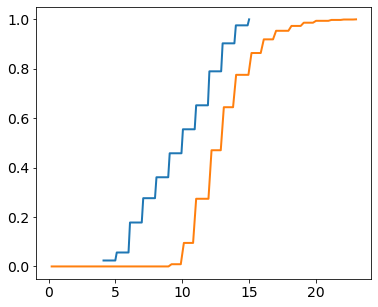

In [10]:
plt.plot(X2[1:], F2,label='arrival',lw=2)
plt.plot(X1[1:], F1,label='discharge', lw=2)
#plt.legend()
plt.show()

#### Add Calculations

In [11]:
# Home floor identifier
df['home'] = np.array(((df.floor==1) & (df.service=='A')) | ((df.floor==2) & (df.service=='B')), dtype=np.int64)

In [12]:
# Add service identifier
df['n_service_A'] = np.array(df.service=='A', dtype=np.int64)
df['n_service_B'] = np.array(df.service=='B', dtype=np.int64)

In [13]:
# Add identifier based on discharge time
df['discharge_before_14'] = np.array(df.discharge_hour<14, dtype=np.int64)
df['discharge_before_13'] = np.array(df.discharge_hour<13, dtype=np.int64)
df['discharge_before_12'] = np.array(df.discharge_hour<12, dtype=np.int64)
df['discharge_before_11'] = np.array(df.discharge_hour<11, dtype=np.int64)

# Add identifier based on bed wait time
df['bed_wait_less_30_min'] = np.array(df.bed_wait_mins<30, dtype=np.int64)
df['bed_wait_less_1_hour'] = np.array(df.bed_wait_mins<60, dtype=np.int64)
df['bed_wait_less_2_hour'] = np.array(df.bed_wait_mins<120, dtype=np.int64)

In [14]:
# Add identifier for extreme cases
df['cm_case'] = np.array(df.case_management_end_time.notna(), dtype=np.int64)
df['equip_case'] = np.array(df.equipment_end_time.notna(), dtype=np.int64)
df['trans_case'] = np.array(df.transport_end_time.notna(), dtype=np.int64)
df['cm_trans_case'] = np.array(df.transport_end_time.notna() & df.case_management_end_time.notna(), dtype=np.int64)
df['cm_equip_case'] = np.array(df.equipment_end_time.notna() & df.case_management_end_time.notna(), dtype=np.int64)
df['cm_trans_med_case'] = np.array(df.transport_end_time.notna() & df.case_management_end_time.notna() & df.pharmacist_end_time.notna(), dtype=np.int64)
df['cm_equip_med_case'] = np.array(df.equipment_end_time.notna() & df.case_management_end_time.notna() & df.pharmacist_end_time.notna(), dtype=np.int64)
df['cm_equip_trans_case'] = np.array(df.equipment_end_time.notna() & df.transport_end_time.notna() & df.case_management_end_time.notna(), dtype=np.int64)
df['cm_equip_trans_med_case'] = np.array(df.equipment_end_time.notna() & df.transport_end_time.notna() & df.case_management_end_time.notna() & df.pharmacist_end_time.notna(), dtype=np.int64)

### Summarize Data (Day Level)

In [15]:
sdf = df.groupby('discharge_date').agg(
    # discharge
    n_discharges=('id','count'),
    avg_discharge_time = ('discharge_hour','mean'),
    percent_discharge_before_14 = ('discharge_before_14','mean'),
    percent_discharge_before_13 = ('discharge_before_13','mean'),
    percent_discharge_before_12 = ('discharge_before_12','mean'),
    percent_discharge_before_11 = ('discharge_before_11','mean'),
    # calender datetime
    weekday = ('discharge_dayofweek','mean'),
    # staff count
    n_md_staff=('rounding MD','nunique'),
    n_app_staff=('rounding APP','nunique'),
    n_nurse_staff=('discharge_process_nurse','nunique'),
    n_cm_staff=('case_management_staff','nunique'),
    n_pharm_staff=('pharmacist_staff','nunique'),
    n_bed_staff=('bedstaff_staff','nunique'),
    # rounding
    rounding_start=('rounding_begin_time', 'min'),
    n_floor_adder=('rounding_floor_adder', 'mean'),
    rounding_mean_queue_length=('rounding_queue', 'mean'),

    # n cases
    perc_transport_cases=('trans_case','mean'),
    perc_equipment_cases=('equip_case','mean'),
    perc_cm_cases=('cm_case','mean'),
    perc_cm_trans_cases=('cm_trans_case','mean'),
    perc_cm_equip_cases=('cm_equip_case','mean'),
    perc_cm_trans_med_cases=('cm_trans_med_case','mean'),
    perc_cm_equip_med_cases=('cm_equip_med_case','mean'),
    perc_cm_equip_trans_cases=('cm_equip_trans_case','mean'),
    perc_cm_equip_trans_med_cases=('cm_equip_trans_med_case','mean'),
    
    # bed wait time
    avg_bed_wait_time=('bed_wait_mins','mean'),
    percent_bed_wait_less_30_min=('bed_wait_less_30_min','mean'),    
    percent_bed_wait_less_1_hr=('bed_wait_less_1_hour','mean'),
    percent_bed_wait_less_2_hr=('bed_wait_less_2_hour','mean'),
    
    # service
    percent_home_floor=('home', 'mean'),
    percent_service_A=('n_service_A','mean'),
    percent_service_B=('n_service_B','mean'),
)
sdf.head()

,n_discharges,avg_discharge_time,percent_discharge_before_14,percent_discharge_before_13,percent_discharge_before_12,percent_discharge_before_11,weekday,n_md_staff,n_app_staff,n_nurse_staff,...,perc_cm_equip_med_cases,perc_cm_equip_trans_cases,perc_cm_equip_trans_med_cases,avg_bed_wait_time,percent_bed_wait_less_30_min,percent_bed_wait_less_1_hr,percent_bed_wait_less_2_hr,percent_home_floor,percent_service_A,percent_service_B
discharge_date,,,,,,,,,,,,,,,,,,,,,
01-01-2023,22,12.500000,0.727273,0.545455,0.272727,0.045455,6.0,3,6,8,...,0.090909,0.045455,0.045455,64.319697,0.363636,0.454545,0.818182,0.454545,0.727273,0.272727
01-01-2024,10,11.500000,1.000000,0.700000,0.600000,0.100000,0.0,1,3,10,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.700000,0.400000,0.600000
01-01-2025,21,12.285714,0.714286,0.619048,0.523810,0.142857,2.0,4,6,10,...,0.047619,0.095238,0.047619,0.000000,1.000000,1.000000,1.000000,0.476190,0.523810,0.476190
01-01-2026,17,12.058824,0.764706,0.588235,0.411765,0.235294,3.0,4,5,8,...,0.000000,0.058824,0.000000,113.127451,0.294118,0.294118,0.352941,0.647059,0.647059,0.352941
01-01-2027,21,13.238095,0.523810,0.523810,0.190476,0.000000,4.0,2,5,10,...,0.047619,0.047619,0.047619,100.665873,0.285714,0.333333,0.476190,0.333333,0.476190,0.523810


#### Add rounding start

In [16]:
sdf.loc[:, 'rounding_start'] = pd.to_datetime(sdf['rounding_start'])
sdf.loc[:, 'rounding_start'] = sdf.rounding_start.dt.hour*60 + sdf.rounding_start.dt.minute

#### Average Discharge labels

In [25]:
sdf['avg_discharge_before_14'] = np.array(sdf.avg_discharge_time<=14, dtype=np.int64)
sdf['avg_discharge_before_13'] = np.array(sdf.avg_discharge_time<=13, dtype=np.int64)
sdf['avg_discharge_before_12'] = np.array(sdf.avg_discharge_time<=12, dtype=np.int64)
sdf['avg_discharge_before_11'] = np.array(sdf.avg_discharge_time<=11, dtype=np.int64)

In [26]:
sdf.reset_index(drop=False).to_csv('summary.csv', index=False)

### Preliminary Analysis

In [27]:
print(
    sdf['avg_discharge_before_11'].mean(),
    sdf['avg_discharge_before_12'].mean(),
    sdf['avg_discharge_before_13'].mean(),
)

0.004932858317347218 0.19210742669224445 0.6407234858865443


In [28]:
sdf.groupby('avg_discharge_before_14').agg(
    less_30_min=('percent_bed_wait_less_30_min','mean'),
    less_1_hour=('percent_bed_wait_less_1_hr','mean'),
    less_2_hour=('percent_bed_wait_less_2_hr','mean')    
)

,less_30_min,less_1_hour,less_2_hour
avg_discharge_before_14,,,
0,0.448654,0.528383,0.697334
1,0.584362,0.641192,0.768167


In [23]:
sdf.groupby('avg_discharge_before_13').agg(
    less_30_min=('percent_bed_wait_less_30_min','mean'),
    less_1_hour=('percent_bed_wait_less_1_hr','mean'),
    less_2_hour=('percent_bed_wait_less_2_hr','mean')    
)

,less_30_min,less_1_hour,less_2_hour
avg_discharge_before_13,,,
0,0.470970,0.540770,0.711557
1,0.622289,0.676176,0.786519


In [17]:
sdf.groupby('avg_discharge_before_12').agg(
    less_30_min=('percent_bed_wait_less_30_min','mean'),
    less_1_hour=('percent_bed_wait_less_1_hr','mean'),
    less_2_hour=('percent_bed_wait_less_2_hr','mean')    
)

,less_30_min,less_1_hour,less_2_hour
avg_discharge_before_12,,,
0,0.510106,0.574751,0.726875
1,0.811074,0.849475,0.897155


In [18]:
sdf.groupby('avg_discharge_before_11').agg(
    less_30_min=('percent_bed_wait_less_30_min','mean'),
    less_1_hour=('percent_bed_wait_less_1_hr','mean'),
    less_2_hour=('percent_bed_wait_less_2_hr','mean')    
)

,less_30_min,less_1_hour,less_2_hour
avg_discharge_before_11,,,
0,0.566370,0.625972,0.758553
1,0.881313,0.941414,0.968182


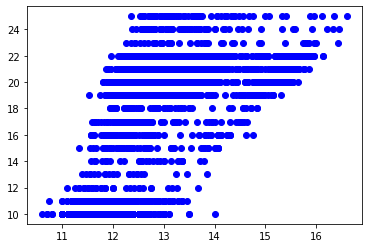

In [20]:
plt.plot(sdf.avg_discharge_time, sdf.n_discharges, 'bo')

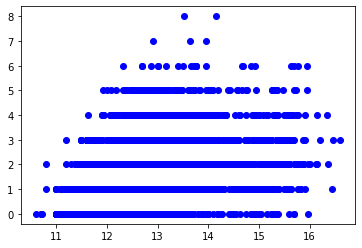

In [21]:
plt.plot(sdf.avg_discharge_time, sdf.n_transport_cases, 'bo')

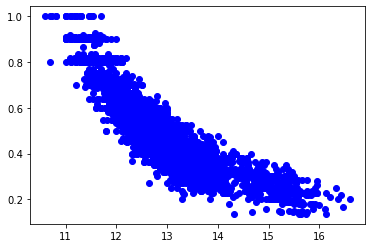

In [22]:
plt.plot(sdf.avg_discharge_time, sdf.percent_discharge_before_13, 'bo')

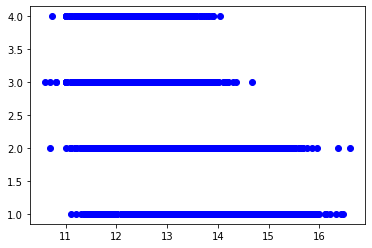

In [30]:
plt.plot(sdf.avg_discharge_time, sdf.n_md_staff, 'bo')

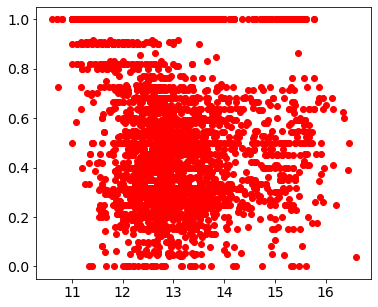

In [21]:
plt.plot(sdf.avg_discharge_time, sdf.percent_bed_wait_less_1_hr, 'ro')